# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [2]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import math
import dill
import scipy.optimize

expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]

# f(a)

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*


***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

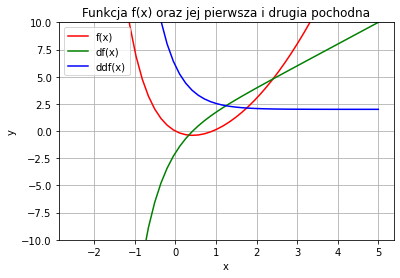

In [2]:
x = np.linspace(-2.5, 5)

y1 = main.fun(x)
y2 = main.dfun(x)
y3 = main.ddfun(x)

plt.figure()
plt.plot(x, y1,'r', label='f(x)')
plt.plot(x, y2, 'g', label='df(x)')
plt.plot(x, y3, 'b', label='ddf(x)')

plt.ylim(-10, 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcja f(x) oraz jej pierwsza i drugia pochodna')
plt.grid('on')
plt.legend()

plt.show()

Miejsca zerowe funkcji f(x) mieszczą się w przedziale od -1 do 1.
Miejsce zerowe pochodnej funkcji f(x) mieści również mieści się w przedziale od -1 do 1.
Miejsce zerowe drugiej pochodnej funkcji f(x) nie istnieje, ponieważ odgórnie zmierza do wartości 2

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

Rozwiązanie zaimplementowałem w pliku main.py

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)

Rozwiązanie zaimplementowałem w pliku main.py


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)

Rozwiązanie zaimplementowałem w pliku main.py


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize

In [3]:
x0 = np.array([0, 1])
mz_root = scipy.optimize.root(main.fun, x0)
mz_fs = scipy.optimize.fsolve(main.fun, x0)

print('Miejsca zerowe dla f(x):')
print('\nUzyskane metodą scipy.optimize.root: {}, {}'.format(mz_root.x[0], mz_root.x[1]))
print('\nUzyskane metodą scipy.optimize.solve: {}, {}'.format(mz_fs[0], mz_fs[1]))


Miejsca zerowe dla f(x):

Uzyskane metodą scipy.optimize.root: 0.0, 0.9165625831056987

Uzyskane metodą scipy.optimize.solve: 0.0, 0.9165625831056987


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Rozwiązanie:

W zadaniu 5 określony został przedział od -1 do 1, dzielę go na dwa przedziały -1 do 0.5 oraz 0.5 do 1 ze względu na warunek: 
funkcja na końcach przedziałów przyjmuje przeciwne znaki.

Metoda bisekcji - 1 przedzial - (-1, 0.5): 
Miejsce zerowe: 2.9103830456733704e-11
Liczba iteracji: 33

Metoda bisekcji - 2 przedzial - (0.5, 1): 
Miejsce zerowe: 0.9165625830646604
Liczba iteracji: 30

Metoda siecznych - 1 przedzial - (-1, 0.5): 
Miejsce zerowe: 4.07625044829274e-11
Liczba iteracji: 75

Metoda siecznych - 2 przedzial - (0.5, 1): 
Miejsce zerowe: 0.9165625830854545
Liczba iteracji: 8

Metoda Newtona - 1 przedzial - (-1, 0.5): 
Miejsce zerowe: None
Liczba iteracji: None

Metoda Newtona - 2 przedzial - (0.5, 1): 
Miejsce zerowe: 0.9165625831056982
Liczba iteracji: 4



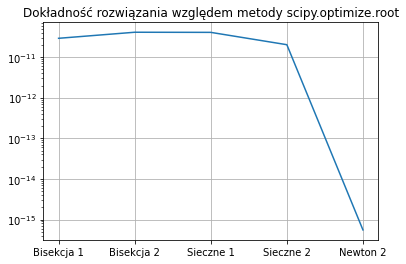

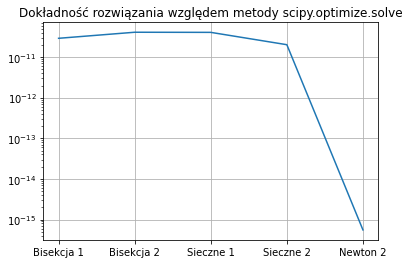

In [22]:
mz_bi1 = main.bisection(-1, 0.5, main.fun, 1e-10, 100)
print('Metoda bisekcji - 1 przedzial - (-1, 0.5): ')
print('Miejsce zerowe: {}'.format(mz_bi1[0]))
print('Liczba iteracji: {}\n'.format(mz_bi1[1]))
# błąd bezwzględny root i solve
bbzr_bi1 = abs(mz_root.x[0]-mz_bi1[0])
bbzs_bi1 = abs(mz_fs[0]-mz_bi1[0])

mz_bi2 = main.bisection(0.5, 1, main.fun, 1e-10, 100)
print('Metoda bisekcji - 2 przedzial - (0.5, 1): ')
print('Miejsce zerowe: {}'.format(mz_bi2[0]))
print('Liczba iteracji: {}\n'.format(mz_bi2[1]))
# błąd bezwzględny root i solve
bbzr_bi2 = abs(mz_root.x[1]-mz_bi2[0])
bbzs_bi2 = abs(mz_fs[1]-mz_bi2[0])

mz_sec1 = main.secant(-1, 0.5, main.fun, 1e-10, 100)
print('Metoda siecznych - 1 przedzial - (-1, 0.5): ')
print('Miejsce zerowe: {}'.format(mz_sec1[0]))
print('Liczba iteracji: {}\n'.format(mz_sec1[1]))
# błąd bezwzględny root i solve
bbzr_sec1 = abs(mz_root.x[0]-mz_sec1[0])
bbzs_sec1 = abs(mz_fs[0]-mz_sec1[0])

mz_sec2 = main.secant(0.5, 1, main.fun, 1e-10, 100)
print('Metoda siecznych - 2 przedzial - (0.5, 1): ')
print('Miejsce zerowe: {}'.format(mz_sec2[0]))
print('Liczba iteracji: {}\n'.format(mz_sec2[1]))
# błąd bezwzględny root i solve
bbzr_sec2 = abs(mz_root.x[1]-mz_sec2[0])
bbzs_sec2 = abs(mz_fs[1]-mz_sec2[0])

mz_newton1 = main.newton(main.fun, main.dfun, main.ddfun, -1, 0.5, 1e-10, 100)
print('Metoda Newtona - 1 przedzial - (-1, 0.5): ')
print('Miejsce zerowe: {}'.format(mz_newton1))
print('Liczba iteracji: {}\n'.format(mz_newton1))
# błąd bezwzględny root i solve
# brak

mz_newton2 = main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, 100)
print('Metoda Newtona - 2 przedzial - (0.5, 1): ')
print('Miejsce zerowe: {}'.format(mz_newton2[0]))
print('Liczba iteracji: {}\n'.format(mz_newton2[1]))
# błąd bezwzględny root i solve
bbzr_newton2 = abs(mz_root.x[1]-mz_newton2[0])
bbzs_newton2 = abs(mz_fs[1]-mz_newton2[0])


bbzr = [bbzr_bi1, bbzr_bi2, bbzr_sec1, bbzr_sec2, bbzr_newton2]
bbzs = [bbzs_bi1, bbzs_bi2, bbzs_sec1, bbzs_sec2, bbzs_newton2]
bbz_x = ['Bisekcja 1', 'Bisekcja 2', 'Sieczne 1',  'Sieczne 2', 'Newton 2']

plt.figure()
plt.plot(bbz_x, bbzr)
plt.title('Dokładność rozwiązania względem metody scipy.optimize.root')
plt.grid()
plt.yscale('log')
plt.show()


plt.figure()
plt.plot(bbz_x, bbzs)
plt.title('Dokładność rozwiązania względem metody scipy.optimize.solve')
plt.grid()
plt.yscale('log')
plt.show()

Im mniejsza wartość, tym bardziej metoda jest dokładna.

Metoda Newtona jest najbardziej dokładna, lecz pozostałe metody są również bardzo efektywne.

174 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
175 µs ± 4.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
185 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
175 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
171 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
168 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
163 µs ± 7.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
156 µs ± 3.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
157 µs ± 4.97 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
155 µs ± 4.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


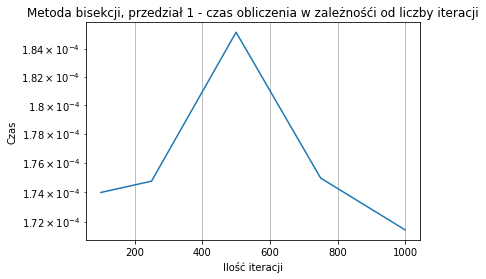

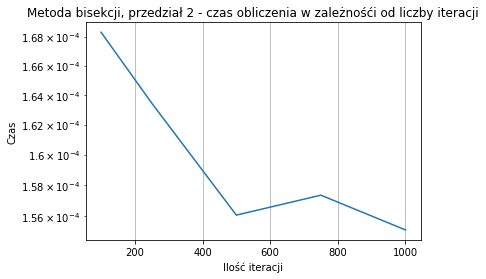

In [24]:
# Testy czasowe w zaleznosci od maksymalnej liczby iteracji - metoda bisekcji

iter_max = [100, 250, 500, 750, 1000]

tb1_100 = %timeit -o main.bisection(-1, 0.5, main.fun, 1e-10, iter_max[0])
tb1_250 = %timeit -o main.bisection(-1, 0.5, main.fun, 1e-10, iter_max[1])
tb1_500 = %timeit -o main.bisection(-1, 0.5, main.fun, 1e-10, iter_max[2])
tb1_750 = %timeit -o main.bisection(-1, 0.5, main.fun, 1e-10, iter_max[3])
tb1_1000 = %timeit -o main.bisection(-1, 0.5, main.fun, 1e-10, iter_max[4])
tb1 = [tb1_100.average, tb1_250.average, tb1_500.average, tb1_750.average, tb1_1000.average]

tb2_100 = %timeit -o main.bisection(0.5, 1, main.fun, 1e-10, iter_max[0])
tb2_250 = %timeit -o main.bisection(0.5, 1, main.fun, 1e-10, iter_max[1])
tb2_500 = %timeit -o main.bisection(0.5, 1, main.fun, 1e-10, iter_max[2])
tb2_750 = %timeit -o main.bisection(0.5, 1, main.fun, 1e-10, iter_max[3])
tb2_1000 = %timeit -o main.bisection(0.5, 1, main.fun, 1e-10, iter_max[4])
tb2 = [tb2_100.average, tb2_250.average, tb2_500.average, tb2_750.average, tb2_1000.average]

plt.figure()
plt.plot(iter_max, tb1)
plt.title("Metoda bisekcji, przedział 1 - czas obliczenia w zależnośći od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Czas")
plt.grid()
plt.yscale('log')
plt.show()

plt.figure()
plt.plot(iter_max, tb2)
plt.title("Metoda bisekcji, przedział 2 - czas obliczenia w zależnośći od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Czas")
plt.grid()
plt.yscale('log')
plt.show()

Czas wykonania metody bisekcji zależnie od liczby iteracji na początku jest wysoki, a potem maleje.

1.28 ms ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.27 ms ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.34 ms ± 44.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.32 ms ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.29 ms ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
185 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
183 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
190 µs ± 8.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
198 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
184 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


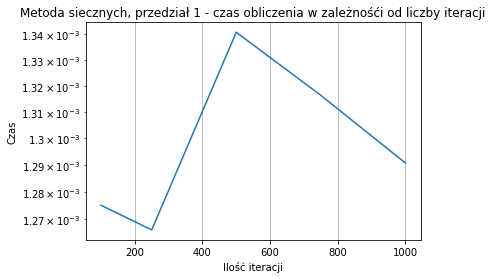

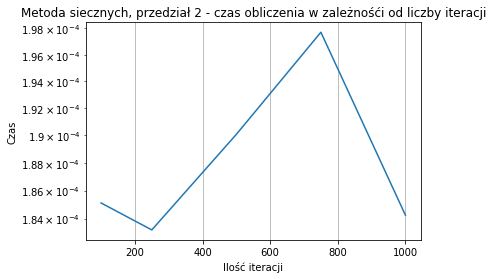

In [25]:
# Testy czasowe w zaleznosci od maksymalnej liczby iteracji - metoda siecznych

iter_max = [100, 250, 500, 750, 1000]

ts1_100 = %timeit -o main.secant(-1, 0.5, main.fun, 1e-10, iter_max[0])
ts1_250 = %timeit -o main.secant(-1, 0.5, main.fun, 1e-10, iter_max[1])
ts1_500 = %timeit -o main.secant(-1, 0.5, main.fun, 1e-10, iter_max[2])
ts1_750 = %timeit -o main.secant(-1, 0.5, main.fun, 1e-10, iter_max[3])
ts1_1000 = %timeit -o main.secant(-1, 0.5, main.fun, 1e-10, iter_max[4])
ts1 = [ts1_100.average, ts1_250.average, ts1_500.average, ts1_750.average, ts1_1000.average]

ts2_100 = %timeit -o main.secant(0.5, 1, main.fun, 1e-10, iter_max[0])
ts2_250 = %timeit -o main.secant(0.5, 1, main.fun, 1e-10, iter_max[1])
ts2_500 = %timeit -o main.secant(0.5, 1, main.fun, 1e-10, iter_max[2])
ts2_750 = %timeit -o main.secant(0.5, 1, main.fun, 1e-10, iter_max[3])
ts2_1000 = %timeit -o main.secant(0.5, 1, main.fun, 1e-10, iter_max[4])
ts2 = [ts2_100.average, ts2_250.average, ts2_500.average, ts2_750.average, ts2_1000.average]

plt.figure()
plt.plot(iter_max, ts1)
plt.title("Metoda siecznych, przedział 1 - czas obliczenia w zależnośći od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Czas")
plt.grid()
plt.yscale('log')
plt.show()

plt.figure()
plt.plot(iter_max, ts2)
plt.title("Metoda siecznych, przedział 2 - czas obliczenia w zależnośći od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Czas")
plt.grid()
plt.yscale('log')
plt.show()

Czas wykonania metody siecznych zależnie od liczby iteracji na początku jest niski, 
później rośnie, a potem maleje. Metoda ta jest minimalnie szybsza od metody bisekcji

34.2 µs ± 690 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.4 µs ± 2.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.1 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.3 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.5 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


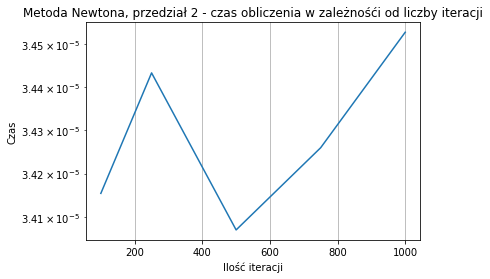

In [3]:
# Testy czasowe w zaleznosci od maksymalnej liczby iteracji - metoda Newtona

iter_max = [100, 250, 500, 750, 1000]

tn2_100 = %timeit -o main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, iter_max[0])
tn2_250 = %timeit -o main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, iter_max[1])
tn2_500 = %timeit -o main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, iter_max[2])
tn2_750 = %timeit -o main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, iter_max[3])
tn2_1000 = %timeit -o main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 1e-10, iter_max[4])
tn2 = [tn2_100.average, tn2_250.average, tn2_500.average, tn2_750.average, tn2_1000.average]

plt.figure()
plt.plot(iter_max, tn2)
plt.title("Metoda Newtona, przedział 2 - czas obliczenia w zależnośći od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Czas")
plt.grid()
plt.yscale('log')
plt.show()

Czas wykonania metody Newtona jest najszybszy z zadancyh metod. Jej czas wykonania rośnie w zależności
od liczby iteracji.

Najbardziej wydajną metodą wyznaczania miejsc zerowych z zadanych metod jest metoda Newtona - 
jej czas wykonania jest najmniejszy oraz wynik jest dokładniejszy od wyników pozostałych metod.